In [1]:
from sklearn.neural_network import MLPClassifier
from matplotlib.pyplot import *
import shap

path = "C:/Users/samue/OneDrive/Documents/GitHub/Explainable-Ai-Comps-2024/MOOC"
sys.path.append(f"{path}/src/") # Add /src/ to path
from svc import SVC
from mlp import MLPClassifier
from data_loader import DataLoader, plot_confusion_matrix

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# Data path
X_train, X_test, y_train, y_test = DataLoader().load(path = f"{path}/data/")
dummy_value = np.array([[1,	0,	0.92,	11000, 32,	197757,	4,	22,	8,	1000]]) # Dummy value (2D Array)
feature_names = ['viewed',	'gender',	'grade', 'nevents', 'ndays_act',	'nplay_video',	'nchapters',	'age',	'votes',	'num_words']
all_classes = all_classes=['Not Completed','Completed']

svc = SVC(from_file = True, filename= f"{path}/src/MITx-SVC.pkl") # Support Vector Classifier
mlp = MLPClassifier(from_file = True, filename = f"{path}/src/MITx-MLP.pkl") # Multi-Layer Perceptron Classifier

pred = svc.predict_proba(X_test)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Trying to unpickle estimator SVC from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator MLPClassifier from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more i

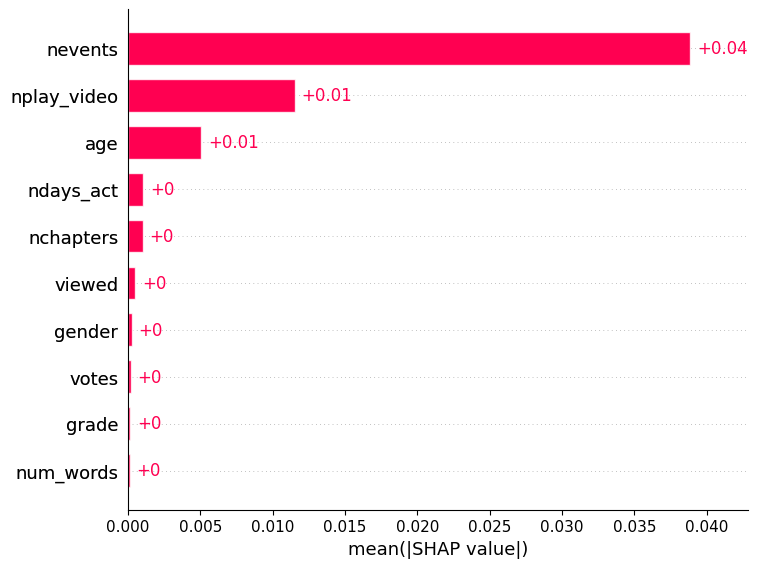

In [3]:
permutation = shap.explainers.Permutation(mlp.predict_proba, X_test, feature_names=feature_names)
# permutation = shap.explainers.Permutation(svc.predict_log_proba, X_test, feature_names=feature_names)
perm_shap_vals = permutation(X_test[:100])[..., 0]
shap.plots.bar(perm_shap_vals)

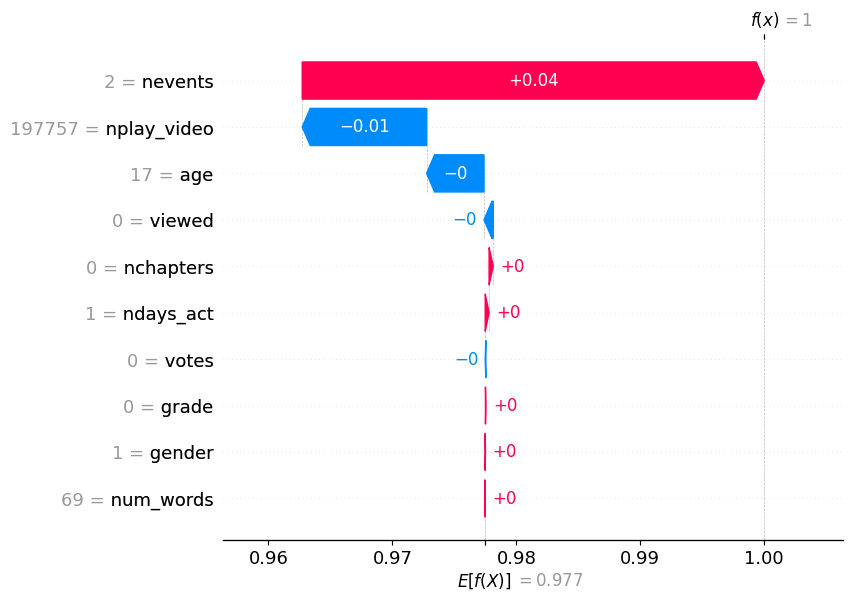

In [4]:
shap.plots.waterfall(perm_shap_vals[0])